# **Notebook X.** Summarizing Classification Outcomes
----


In  the earlier notebooks we have tested different classification models. 

Here, we provide a comparison of all of the models as well as an in-depth analysis of the "best performing" model. 

# X.1. Preamble: Load Packages 
---

In [ ]:
# General Packages #
import os
import pandas as pd
import numpy as np

# Load TQDM to Show Progress Bars #
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook

# Sklearn Packages #
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Turn of warnings, just to avoid pesky messages that might cause confusion here
# Remove when testing your own code #
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount Personal Google Drive on own Machine -- You have to follow the link to log in #
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# X.2. Compare Classification Results ##
---------------- 

We have saved our model classification results in Google Drive. Here, we are going to compare the different classification results. 

In [ ]:
# Change to Working Directory with Training Data # 
os.chdir("/content/drive/MyDrive/USPTO AI Patent Classification/")

# Collect a list of all of the files where we saved classification results # 

Counter = 0
for root, dirs, files in os.walk("./Output/Model Performance/"):
  for file in files: 
    temp = pd.read_csv("./Output/Model Performance/" + file)
    if Counter == 0:
      Combined = temp
    else:
      Combined = pd.concat([Combined, temp])
    Counter = Counter + 1


In [ ]:
# See the Ouptut with All Models #

Combined.drop("Unnamed: 0", axis = 1).sort_values("Accuracy", ascending = False)

,Name,Type,Share,True-Positives,False-Negatives,False-Positives,True-Negatives,Accuracy,AUC,Precision,Recall,F1
0,Random Forest,Bag of Words,0.183,0.940,0.965,0.060,0.035,0.960,0.922,0.940,0.858,0.897
0,SciBERT,Transformer,0.201,0.882,0.970,0.118,0.030,0.952,0.926,0.882,0.882,0.882
2,PatentSBERTa,Transformer,0.211,0.858,0.975,0.142,0.025,0.950,0.932,0.858,0.901,0.879
3,BioBERT,Transformer,0.211,0.858,0.975,0.142,0.025,0.950,0.932,0.858,0.901,0.879
1,ALBERT,Transformer,0.194,0.890,0.964,0.110,0.036,0.950,0.915,0.890,0.857,0.873
4,DistilBERT,Transformer,0.219,0.834,0.976,0.166,0.024,0.945,0.931,0.834,0.907,0.869
5,BERT,Transformer,0.215,0.837,0.973,0.163,0.027,0.944,0.925,0.837,0.894,0.865
6,XLNet,Transformer,0.218,0.833,0.974,0.167,0.026,0.944,0.928,0.833,0.901,0.866
1,Support Vector Classifier (RBF),Bag of Words,0.174,0.912,0.949,0.088,0.051,0.943,0.886,0.912,0.791,0.847
7,RoBERTa,Transformer,0.224,0.821,0.977,0.179,0.023,0.942,0.931,0.821,0.913,0.865


In [ ]:
# Best Performing Model #

Combined.drop("Unnamed: 0", axis = 1).sort_values("Accuracy", ascending = False).head(1)

,Name,Type,Share,True-Positives,False-Negatives,False-Positives,True-Negatives,Accuracy,AUC,Precision,Recall,F1
0,Random Forest,Bag of Words,0.183,0.94,0.965,0.06,0.035,0.96,0.922,0.94,0.858,0.897


In [ ]:
Combined.to_csv("./Output/All Model Performance Combined.csv")

The Random Forest Model performs best on two important metrics: 

- **Accuracy**  [ *Total Share of Observations Correctly Classified* ] 
- **False Positives** [ *Total Share of Postive Values (AI Patents) Incorrectly Classified* ] 

In our case, we are particulary concerned about False Positives. We would prefer to have a smaller share of False Positives but a higher share of True Negatives than the opposite (this would mean our subsequent results are a lower bound and more conservative than the alternative).

For other applications, we might want to focus on the overall accuracy or recall (which reflects both False Positives and True Negatives)

*Note.* An additional benefit of using a Bag-of-Words (BOW) model is that it is fast (computationally cheap) to classify the entire database of AI patents. In comparison, Transformer models are typically much slower in classifying observations. Researchs may want to consider this difference if they use datasets with a vary large number of observations. 

# X.3. Load Classification Results [Random Forest Model Only] ##
---------------- 


In [ ]:
# Classified Training Data #

CTData = pd.read_csv("./Output/Classification Output/BOW Classification Results.csv")

CTData = CTData[['id', 'Actual', 'Random Forest']]

CTData.columns = ['id', 'Actual', 'Predicted']


### X.3.1 Plot Confusion Matrix 
---- 

Below, we plot a normalized confusion matrix. This provides an intuitive representation of the share of correct and incorrect predictions (e.g. False Positives).  

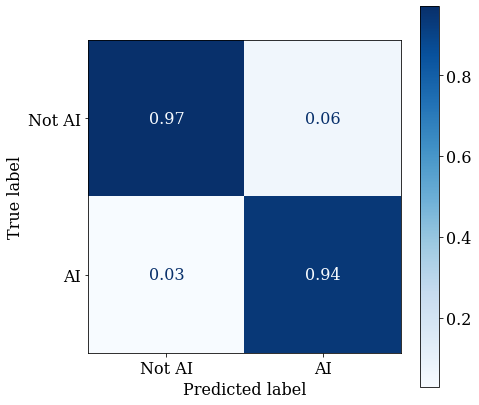

In [ ]:
# Plot confusion Matrix # 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'serif'

cm = confusion_matrix(CTData['Actual'].values.tolist(), CTData['Predicted'].values.tolist())
cm = np.round(cm/cm.sum(axis = 0), 2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not AI', 'AI'])
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(cmap=plt.cm.Blues, ax = ax)
plt.show()

The confusion matrix reflects the share of values that were classified either correctly or incorrectly. This confusion matrix is normalized by the number of predicted labels. Therefore, we can see that of those where **Predicted Label** is **AI**, 92% were correctly classified, and only 8% were misclassified. 


For more in-depth comparisons, we need to also observe the probability of being AI related, rather than just the binary classification.

### X.3.2 Plot Receiver Operating Characteristic (ROC) Curve

--- 

ROC Curves provide a representation of model accuracy that shows how the model is able to correctly identify positive values (i.e. AI patent). There is an inherent tradeoff in that if we classify more observations as being AI patents, we may capture more real AI patents (i.e. True Positive Rate), but also may incorrectly classify non-AI patents as being AI related (i.e. False Positive Rate). 

A model that performs well does a good job of balancing this tradeoff and can achieve a high rate of True Positives, with a low rate of false positives (this can be seen as a steep vertical line followed by a flat line). Any point on this curve can be interpreted as the level of false positives one would expect to get for a given level of true positives (e.g. 80% True Positive Rate coresponds to 3% False Positive Rate). 

In order to compare different models we can compute the area under the curve (AUC). This indicates the share of the geometric area covered by the curve. A value of 1 means a perfect classification (100% True Positive Rate, with 0% False Positive Rate). 

Below we plot the ROC Curve for the Random Forest [BOW] Model and report the AOC. AOC values for all models are reported in results summary tables. 

In [ ]:
CTDataP = pd.read_csv("./Output/Classification Output/Random Forest - BOW [Predicted Probabilities].csv")

CTDataP = CTDataP[['id', 'Actual', 'Random Forest']]

CTDataP.columns = ['id', 'Actual', 'p1']


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(CTDataP['Actual'].ravel(), CTDataP['p1'].ravel())
roc_auc = auc(fpr, tpr)

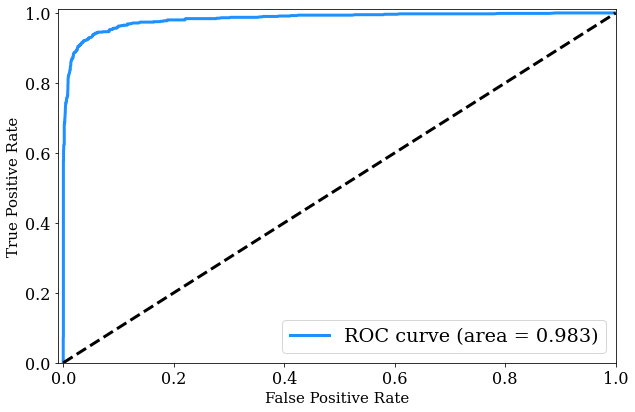

In [ ]:
plt.figure(figsize= (10,6.5))
plt.plot( fpr, tpr, color='dodgerblue', lw=3,
          label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=3, linestyle='--', color = 'black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size = '15')
plt.ylabel('True Positive Rate', size = '15')
plt.legend(loc="lower right", fontsize = 'large')
#plt.title('Receiver operating characteristic example')
plt.ylim(0,1.01)
plt.xlim(-0.01,1)

plt.show()

### X.3.3 Precision Recall Curve 

--- 

One misleading aspect about ROC curves is that they may be overly positive (optimistic) when there is class imbalance. This is because the model can naturally achieve a high True Positive Rate by favoring the dominant class. 

A precision recall curve plots the precision (share of actual positives correctly classified among all positive values) with respect to the recall (share of positives predicted positives, correctly classified). The mean of these two values is the F1 Score. 

A well performing model has high precision and high recall. Whereas a low performing model (typically with imbalanced classes) has a high precision, but low recall. This coresponds to a graph that is flat and then declines sharply as it approaches high recall values. Reading values on the graph can indicate at what level of precision, we can expect to achieve which level of recall (e.g. 90% precision, 90% recall). 

Below we plot the Precision-Recall Curve for the Random Forest [BOW] Model and report the Average precision Score. Like the AUC metric, it reflects how well this model performs and allows us to comapare different models. We illustrate f1 thresholds using grey lines on the model. This indicates the domains where we would achieve a high f1 score which may be a more intuitive metric. 

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(CTDataP['Actual'].ravel(), CTDataP['p1'].ravel())
average_precision = average_precision_score(CTDataP['Actual'].ravel(), CTDataP['p1'].ravel(), average="micro")

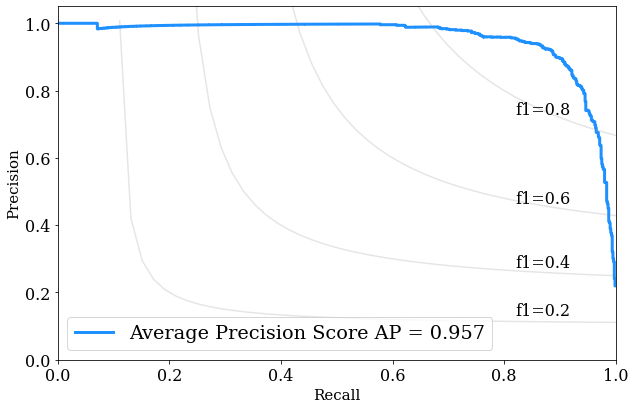

In [ ]:
eplt.figure(figsize= (10,6.5))
plt.step(recall, precision, where='post', lw = 3, color = 'dodgerblue',
         label='Average Precision Score AP = %0.3f' % average_precision)
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.82, y[45] + 0.02))
plt.xlabel('Recall', size = '15')
plt.ylabel('Precision', size = '15')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left", fontsize = 'large')
plt.show()